<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2019 Practicum 2
***

This practicum is due on Canvas by **11:59 PM on Wednesday December 11**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Muntaha Pasha

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

from calendar import month_name, different_locale
from scipy import stats
import statsmodels.api as sm
from scipy.special import binom
import scipy

<br>

---
<a id='p1'></a>
[Back to top](#top)

### [40 points] Problem 1:  Amazon Forest Fires

A non-profit orgranization is trying to protect the Amazon rain forest and has recruited you as their head data scientist. For your first task, they've given you a dataset with the number of fires in each state in the Amazon region during each month between 1998 and 2017. They would like to have a 95% confidence interval for the true median number of forest fires that occur in each state on a yearly basis. 

In [2]:
#Starter Code
dfForest = pd.read_csv('amazon.csv', thousands='.', decimal ='/', engine='python')
dfForest.info()
dfForest.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6453 non-null object
state     6452 non-null object
month     6454 non-null object
number    6448 non-null float64
date      6450 non-null object
dtypes: float64(1), object(4)
memory usage: 252.2+ KB


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


**Part A:**  This dataset isn't paticularly useful in it's current state, so we'll need to clean it up a bit. Some data scientists say that most of their job is to wrangle data, so this will give you a taste of cleaning a real world data set. Perform the following tasks:
1. Drop the 'date' column. The only information this column holds is the year, which we already have in another column. 
2. Drop any rows with null values in any of the remaining columns
3. Print all the unique values of the 'month' column. You'll notice that one is encoded with a differant character encoding then the format that pandas is using.
3. Convert the Portugese month names to English month names. We've included the 'month_name' and the 'different_encoding' modules of the python calendar library in the top cell above, if you would like to use them. There are many ways to accomplish this task, and these modules are not required, but may make things easier. As part of this step, you should make sure that the Portugese month with the encoding problem is translated to the correct English month. 
4. Check the number column for any values that seem impossible. Drop any negative or fractional values, or any values over 50,000. 50,000 is large enough that no Brazilian state would ever have that many forest fires in one month, so we should get rid of anything above 50000. 
5. Since you're new on the job, some of your co-workers may have played a prank on you... Print out all the unique values of the 'year' column and drop any rows with values that don't make sense.
6. Find the total number of rows remaining after you've done all of the above and write it out in a markdown cell. if you have correctly performed all of the tasks above, your dataframe should now have 6438 rows.

**NOTE:** Since some of these tasks are not totally trivial, you may use any resources other than your classmates on this part of this problem. This means you may consult google, stack overflow, the python/pandas documentation, some random book on pandas you might have, etc... But you may not consult your classmates for help. ***CITE ALL RESOURCES USED IN A CODE COMMENT. A URL OR A BOOK TITLE IS SUFFICIENT. ANY CODE OBIVOUSLY COPIED FROM OUTSIDE SOURCES WITH OUT A CITATION WILL EARN YOU NO CREDIT ON THIS PROBLEM. YOU ARE ALLOWED TO USE THESE RESOURCES ONLY ON THIS PART OF THIS PROBLEM!***

**SOURCES USED:**

1 - (Dropping a Column) https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe

2 - (Checking Integers) https://stackoverflow.com/questions/49252160/check-if-float-is-an-integer-is-integer-vs-modulo-1

3 - (Iterating over Rows) https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

4 - (In-Place) https://stackoverflow.com/questions/43893457/understanding-inplace-true

In [3]:
#1 - Drop the date column
dfForest = dfForest.drop("date", 1)
#2 - Drop any rows with null values
dfForest = dfForest.dropna()
#3 - Print all Unique Months
dfForest.month.unique()
#4 - Make the spanish months english names instead.
dfForest.replace({"Janeiro": "January", "fevereiro":"February", "Março":"March", "Abril":"April", "Maio":"May", "Junho":"June", "Julho":"July", "Agosto":"August", "Setembro":"September","Outubro":"October", "Novembro":"November","Dezembro":"December"})
#5 - Drop any negative or fractional vales and anything > 50000
bigValues = dfForest[dfForest['number']>=50000].index #Handling values > 50,000
dfForest.drop(bigValues, inplace = True)
#Now for our next case.
negValues = dfForest[dfForest['number']<0].index #Handling values < 0
dfForest.drop(negValues, inplace = True)
#Handling the case that it is a fraction.
for i, row in dfForest.iterrows():
    #If it's not an integer, then drop it.
    if row['number'].is_integer() == False:
        dfForest.drop(i, inplace = True)
#6 - Printing all the unique years
dfForest.year.unique()
#Removing all the values that make 0 sense!
nonsensical = ['1000bc', '10bc', '-40', "our new data scientist won't notice this"]
#Iterate through the dataframe
for i, row in dfForest.iterrows():
    #If a value in the year column is nonsensical, then just drop it.
    if row['year'] in nonsensical:
        dfForest.drop(i, inplace = True)
#7 - Print number of rows.
print("The Following Counts are...")
print("-----------------------------")
dfForest.count()

The Following Counts are...
-----------------------------


year      6438
state     6438
month     6438
number    6438
dtype: int64

**PART A (Solution):**

As you can see in the code above, I used some new techniques, as well as old techniques we have learned about in class to do the calculations. The counts I got for each column corresponds with the expected 6438 rows! $\checkmark$

**Part B:** Extract the median number of forest fires per month, yearly, by state. Store these median values in the given python dictionary.

For Example:

If one year of one state had the following numbers of fires:

Jan: 1

Feb: 2

Mar: 3

Apr: 4

May: 5

Jun: 6

Jul: 7

Aug: 8

Sep: 9

Oct: 10

Nov: 11

Dec: 12

Then the median number of forest fires per month would be 6.5 (the average of the two middle elements since this has an even length)

If the state of "test" had 5 years of recorded data, with the following median forest fire values: \[1, 2, 7, 9, 3\],  then python dictionary should look like: 

\{

    "test": [1, 2, 7, 9, 3]
    
\}

Below we've given you one of the states values in a test, so you can ensure you are calculating the medians correctly.

In [4]:
#GIVEN DICTIONARY CODE
median_num_fires_monthly_yearly = {
    'Acre': None,
    'Alagoas': None,
    'Amapa': None,
    'Amazonas': None,
    'Bahia': None,
    'Ceara': None,
    'Distrito Federal': None,
    'Espirito Santo': None,
    'Goias': None,
    'Maranhao': None,
    'Mato Grosso': None,
    'Minas Gerais': None,
    'Para': None,
    'Paraiba': None,
    'Pernambuco': None,
    'Piau': None,
    'Rio': None,
    'Rondonia': None,
    'Roraima': None,
    'Santa Catarina': None,
    'Sao Paulo': None,
    'Sergipe': None,
    'Tocantins': None  
}

In [5]:
#Now we will compute the median values.
def mediansFunc(dictionary):
    #For each value in the dictionary...
    for val in dictionary:
        #Declaring an initial list to hold our values.
        ListVals = []
        #For each year in the range they gave us from 1198 to 2018.
        for year in range(1998,2018):
            #The median is the year in the dataframe with the string year, and if the state is the value we need, take the median of the numbers.
            medians = dfForest[(dfForest['year'] == str(year)) & (dfForest['state'] == val)].number.median()
            #Append the medians to the list.
            ListVals.append(medians)
        #Append the medians list to each value of the dictionary.
        dictionary[val] = ListVals
#Now for testing.
#Run the function on the median number of fires monthly/yearly
mediansFunc(median_num_fires_monthly_yearly)
#Print out the medians now.
print(median_num_fires_monthly_yearly)

{'Acre': [1.5, 0.0, 1.0, 0.5, 1.0, 8.0, 7.0, 13.0, 6.0, 4.5, 0.0, 2.5, 6.0, 7.0, 5.0, 13.5, 12.0, 24.0, 33.5, 45.0], 'Alagoas': [0.0, 4.0, 7.5, 3.0, 13.0, 12.5, 6.5, 11.5, 8.0, 4.5, 18.0, 21.5, 10.5, 20.0, 24.5, 14.5, 12.5, 36.0, 13.5, 8.5], 'Amapa': [0.0, 1.5, 1.0, 0.5, 5.0, 8.0, 7.0, 3.0, 4.0, 0.0, 2.0, 4.0, 2.0, 4.0, 13.0, 2.5, 7.0, 9.5, 12.0, 3.0], 'Amazonas': [4.0, 9.0, 55.5, 8.5, 30.5, 152.5, 107.5, 61.0, 21.5, 63.5, 24.0, 57.5, 119.5, 87.0, 62.5, 138.0, 138.0, 231.5, 433.0, 119.0], 'Bahia': [52.0, 95.0, 92.5, 129.5, 376.5, 407.5, 299.5, 240.0, 227.0, 321.5, 253.0, 278.5, 261.5, 209.5, 400.0, 259.5, 233.5, 281.0, 376.5, 174.0], 'Ceara': [38.5, 65.0, 17.0, 113.5, 54.0, 61.5, 22.5, 38.0, 36.5, 96.5, 22.0, 17.0, 132.5, 25.0, 161.5, 40.5, 81.0, 76.0, 112.0, 26.0], 'Distrito Federal': [0.0, 1.5, 0.5, 0.5, 1.0, 0.5, 3.5, 2.0, 0.5, 2.5, 3.0, 2.0, 7.0, 1.5, 2.0, 2.0, 4.0, 1.5, 7.0, 6.0], 'Espirito Santo': [4.5, 9.5, 5.0, 6.5, 10.5, 24.5, 4.5, 5.0, 10.5, 11.0, 6.5, 12.5, 8.5, 6.5, 22.5, 1

In [6]:
#Given Test
assert median_num_fires_monthly_yearly['Acre'] == \
[1.5, 0.0, 1.0, 0.5, 1.0, 8.0, 7.0, 13.0, 6.0, 4.5, 0.0, 2.5, 6.0, 7.0, 5.0, 13.5, 12.0, 24.0, 33.5, 45.0] \
, "something is wrong here"

In [7]:
#DONT CHANGE THIS. WE USE IT TO MAKE THE OUTPUT LEGIBLE FOR GRADING
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(median_num_fires_monthly_yearly)

{'Acre': [1.5,
          0.0,
          1.0,
          0.5,
          1.0,
          8.0,
          7.0,
          13.0,
          6.0,
          4.5,
          0.0,
          2.5,
          6.0,
          7.0,
          5.0,
          13.5,
          12.0,
          24.0,
          33.5,
          45.0],
 'Alagoas': [0.0,
             4.0,
             7.5,
             3.0,
             13.0,
             12.5,
             6.5,
             11.5,
             8.0,
             4.5,
             18.0,
             21.5,
             10.5,
             20.0,
             24.5,
             14.5,
             12.5,
             36.0,
             13.5,
             8.5],
 'Amapa': [0.0,
           1.5,
           1.0,
           0.5,
           5.0,
           8.0,
           7.0,
           3.0,
           4.0,
           0.0,
           2.0,
           4.0,
           2.0,
           4.0,
           13.0,
           2.5,
           7.0,
           9.5,
           12.0,
           3.0

**Part C:** Since we cannot rely on the central limit thereom for the median, we'll bootstrap some samples. Bootstrap 1000 samples for each state. Each bootstrapped sample should have 50 values drawn from the original sample.

Find the median of each bootstrapped sample, and add it to a list. Save the list of median values for the states of **Sao Paulo** and **Goias**. We'll use them later to plot in part D. Then determine the 95% confidence interval of the true median from each list of bootstrapped medians for each state. Add a list of the low and high values of the confidence interval to the given python dictionary below. To help you check your work, the confidence interval of the state of Acre should be from roughly 4 to 7. Your values will change though, because each bootstrapped sample is picked randomly from the original.

For Example:

If the 95% confidence interval on the median is from 6 to 22 for the state of "test", then the dictionary would look like:

{

    "test": [6, 22]
    
}

**SOURCES USED:**

1 - (Standard Error of Measure) https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.sem.html

2 - (Samples) https://www.geeksforgeeks.org/python-pandas-dataframe-sample/

3 - (Random Choice) https://pynative.com/python-random-choice/

In [48]:
#GIVEN CODE
median_num_fires_bootstrap = {
    'Acre': None,
    'Alagoas': None,
    'Amapa': None,
    'Amazonas': None,
    'Bahia': None,
    'Ceara': None,
    'Distrito Federal': None,
    'Espirito Santo': None,
    'Goias': None,
    'Maranhao': None,
    'Mato Grosso': None,
    'Minas Gerais': None,
    'Para': None,
    'Paraiba': None,
    'Pernambuco': None,
    'Piau': None,
    'Rio': None,
    'Rondonia': None,
    'Roraima': None,
    'Santa Catarina': None,
    'Sao Paulo': None,
    'Sergipe': None,
    'Tocantins': None  
}

In [49]:
#First thing I'm going to do is get my actual list of SaoPaulo and Goias.
Lists={'Sao Paulo': None, 'Goias' : None}
#Now, I am going to define my bootstrap function which will take 2 lists.
def bootstrapping(list1, list2, numTimes, sampleAmount):
    #For every state in the first list...
    for eachState in list1:
        #Declare a new list
        ListN = []
        #Now repeat this process the number of times needed (1000) in our case.
        for i in range(numTimes):
            #Random value is selected using np.random for each state and a sample size of your choosing (50) for us.
            #Replacement is true here.
            randomVal = np.random.choice(list1[eachState], sampleAmount, replace=True)
            #Median values is the medians of the random values.
            medians = np.median(randomVal)
            #Append those medians to a list.
            ListN.append(medians)
        #if the state is in the list...
        if eachState in Lists:
            #Then update lists the newlist defined above.
            Lists[eachState] = ListN
        #Calculate lower bound
        lowerB = np.percentile(ListN, 2.5)
        #Calculate upper bound
        upperB = np.percentile(ListN, 97.5)
        #Find the confidence interval by putting the two into an array
        ConfInt = np.array([lowerB, upperB])
        #So then the list2 of each state is the confidence intervals that we want!
        list2[eachState] = ConfInt
#Here we get our result.
bootstrapping(median_num_fires_monthly_yearly, median_num_fires_bootstrap, 1000, 50)

In [50]:
#DONT CHANGE THIS. WE USE IT TO MAKE THE OUTPUT LEGIBLE FOR GRADING
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(median_num_fires_bootstrap)

{'Acre': array([4.5, 7. ]),
 'Alagoas': array([ 8.5, 13. ]),
 'Amapa': array([2.5, 4. ]),
 'Amazonas': array([ 57.475, 107.5  ]),
 'Bahia': array([233.5, 278.5]),
 'Ceara': array([38., 65.]),
 'Distrito Federal': array([1.5, 2. ]),
 'Espirito Santo': array([ 8.5, 11. ]),
 'Goias': array([ 98. , 166.5]),
 'Maranhao': array([620.5, 822.5]),
 'Mato Grosso': array([364., 543.]),
 'Minas Gerais': array([136.  , 168.25]),
 'Para': array([471.5, 679. ]),
 'Paraiba': array([45.5, 58. ]),
 'Pernambuco': array([21.25, 31.75]),
 'Piau': array([193., 308.]),
 'Rio': array([22.5, 29.5]),
 'Rondonia': array([ 41., 116.]),
 'Roraima': array([44.425, 75.25 ]),
 'Santa Catarina': array([29.    , 43.0125]),
 'Sao Paulo': array([111.5, 164.5]),
 'Sergipe': array([1.5, 5. ]),
 'Tocantins': array([171., 337.])}


**PART C (Solution)**

From my understanding, bootstrapping is taking random samples of $n$ size, but allowing replacement. Bootstrapping typically works by resampling the sample data and then performing some inference about a particular sample from the data that was resampled. In the resampled Boostrap, the population is the sample which is known to us so the measure of the inference of the true sample from our resampled data CAN infact be measured. Here I took 1000 random samples of $n=50$ size, and then took the median of each bootstrapped sample, adding it to a list! I then calculated the confidence interval from that, (all shown in the code above). I was unfortunately unable to quite get my interval lined up betweeb 4 and 7 for acre as was expected, I was really close, getting a value from around 6 to 7, or from 5 to 7 each time. $\checkmark$

**Part D:** Plot a histogram of the frequency of different median values for the two states **Sao Paulo** and **Goias**. Overlay these histograms on the same plot. Include axis labels, a title, a legend, etc. Choose two colors that work well together and provide enough contrast (e.g. No one can see gold overlayed with yellow), and use reasonable values of the **alpha** parameter so you can see both histograms. Plot two vertical lines that represent the outer bounds of the 95% confidence interval on the true median for each state, in the same color as the state. Does the data for the median look normally distributed? Why or why not? Does this validate our decision to not use the central limit theorem and instead bootstrap our median samples? Explain in a markdown cell below.

**SOURCES USED:**

1 - (Vertical Lines) https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html

2 - (Legends) https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

3 - (Series) https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html

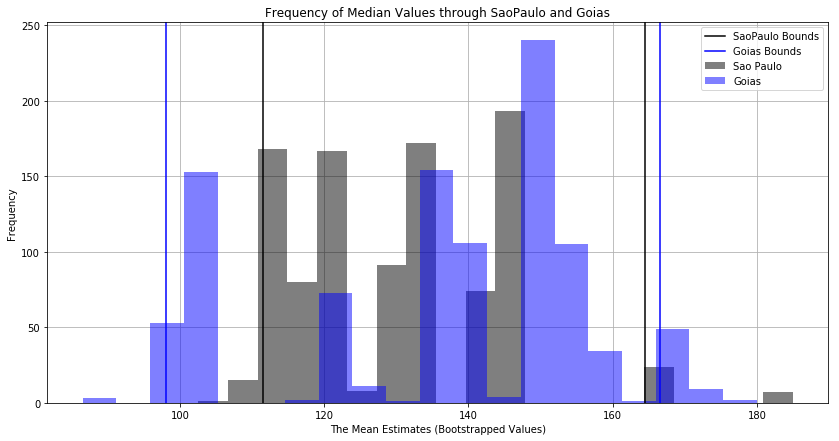

In [53]:
#Get the figure size.
fig, ax = plt.subplots(figsize=(14,7))
#Plot the graph for Sao Paulo. We want the frequency.
pd.Series(Lists['Sao Paulo']).hist(ax=ax, bins=20, alpha = 0.5, color="Black", label = "Sao Paulo")
#Now plot the graph for Goias. We want frequency graph.
pd.Series(Lists['Goias']).hist(ax=ax, bins=20, alpha = 0.5, color="Blue", label = "Goias")
#Put a title.
plt.title("Frequency of Median Values through SaoPaulo and Goias")
#Label the y-axis
ax.set_ylabel("Frequency")
#label the x-axis
ax.set_xlabel("The Mean Estimates (Bootstrapped Values)")
#Put axis below graph
ax.set_axisbelow(True)
#Find the C.I for Sao Paulo
confIntSaoPaulo = median_num_fires_bootstrap['Sao Paulo']
#Find the C.I for Goias
confIntGoias = median_num_fires_bootstrap['Goias']
#Create a lower bound for Sao Paulo line
plt.axvline(x = confIntSaoPaulo[0], color = "black", label = "SaoPaulo Bounds")
#Create a upper bound for Sao Paulo line
plt.axvline(x = confIntSaoPaulo[1], color = "black")
#Create a lower bound for Goias line
plt.axvline(x = confIntGoias[0], color = "blue", label = "Goias Bounds")
#Create a upper bound for Goias line
plt.axvline(x = confIntGoias[1], color = "blue")
#Make a legend
plt.legend(loc = "upper right")
#Show the plot
plt.show()

**PART D (Solution):**

To re-iterate, the intervals are shown with vertical lines, and labels are given above in the legend to demonstrate where one interval ends and the other begins. Aside from that point, I noticed, and it is quite evident that, the median data does not look like a normal distribution at all! It is very non-uniform, does not at all resemble a bell shaped curve we would expect, and frequencies are occurring every which way. With a normal distribution, you have a bell-curve shape which is evidently not present here. And so when you have data that appears to be unevenly distributed and all over the place as seen above, that is when you use the bootstrap method to make it appear more like a normal distribution. Once you start taking more and more samples, you will get a stronger resemblance to a normal distribution! $\checkmark$

<br>

---
<a id='p2'></a>
[Back to top](#top)

### [40 points] Problem 2:  Sharknado Prediction

Governor Hickenlooper has charged you with the task of assessing the factors associated with sharknado risk in Colorado. As everyone knows, sharknadoes are a leading cause of sharknado-related illness, and you are a world-renowned data/shark scientist.

You decide to use multiple linear regression to understand and predict what factors lead to increased sharknado hazard. Your lead scientist, aptly named Fin, has collected lots of relevant data at a local sharknado hotspot, the Boulder Reservoir[\*](#footnote). The data cover a variety of sharknado-related environmental and other conditions, and you'll find this data in the file `sharknadoes.csv`. 

**Response**: 

- $\texttt{sharknado hazard}$: the hazard of a sharknado, where 1 is very unlikely and 100 is highly likely

**Features**: 

- $\texttt{taunts}$: the number of times over the past year that someone has taunted a shark
- $\texttt{clouds}$: what percentage of the sky was covered by clouds (fraction, 0-1)
- $\texttt{precipitation}$: amount of precipitation in the past 72 hours (inches)
- $\texttt{earthquake}$: the intensity of the most recent earthquake measured in the continental United States
- $\texttt{shark attacks}$: the number of shark attacks within 72 hours prior to the observation
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the beach concession stand 
- $\texttt{misery index}$: an economic indicator for how miserable the average United States citizen is, based on the unemployment rate and the inflation rate. More [here](https://www.stuffyoushouldknow.com/podcasts/whats-the-misery-index.htm) and [here](https://en.wikipedia.org/wiki/Misery_index_(economics)). Higher values correspond to more miserable citizens.
- $\texttt{temperature}$: the outside temperature, measured in degrees Fahrenheit
- $\texttt{humidity}$: relative humidity (percent, 0-100)
- $\texttt{pizzas sold}$: the number of pizzas sold at the beach concession stand in the past year
- $\texttt{pressure}$: local air pressure (millibar) 
- $\texttt{octopuses}$: the number of octupuses in the vicinity on the day of the observation
- $\texttt{Zach's shoe size}$: the size of the shoes Zach was wearing when the observation was made
- $\texttt{Rachel's shoe size}$: the size of the shoes Rachel was wearing when the observation was made

**Part A**: Read the data from `sharknadoes.csv` into a Pandas DataFrame.  Note that since we will be doing a multiple linear regression we will need all of the features. To make sure the data is "clean", drop any row in the DataFrame that is missing data. 

In [54]:
#Your code here.
#Let's first read in our file.
dfSharks = pd.read_csv("sharknadoes.csv")
#Drop all the rows with missing data!
dfSharks = dfSharks.dropna()
#Print the head so I can see what columns are present.
dfSharks.head()

,clouds,earthquake,pizzas sold,taunts,pressure,shark attacks,octopuses,precipitation,misery index,ice cream sold,humidity,temperature,Zachs shoe size,Rachels shoe size,sharknado hazard
0,1.00,7.1,5560.0,15.0,847.12,2.0,7.0,0.824059,12.987180,273.0,86.41,78.0,42.0,9.0,40.22
1,1.00,7.4,5179.0,20.0,844.34,4.0,5.0,0.993296,16.765435,184.0,96.67,89.0,42.0,9.5,36.42
2,1.00,7.0,5227.0,0.0,839.48,9.0,2.0,1.173342,16.494518,141.0,53.85,65.0,9.5,9.0,19.54
3,0.13,7.9,5226.0,34.0,851.28,2.0,6.0,0.919291,8.277176,146.0,88.72,36.0,9.5,10.0,85.00
4,1.00,7.5,5491.0,6.0,852.67,2.0,4.0,1.729127,5.904750,178.0,63.08,72.0,42.0,9.0,56.34


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.025$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

**SOURCES USED:**

1 - (sm.OLS in Python) https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

**PART B (Solution):**

To solve this particular problem, let's use an F-Test with the following hypotheses...

$$H_0: \beta_1 = \beta_2 = \beta_3 = \beta_4 = \ldots = \beta_{13} = \beta_{14} = 0$$
$$H_1: \beta_m \neq 0 \textrm{, For at least one } m = 1, 2, 3, \ldots, 14$$

We can use a $\text{sm.OLS}$ to do this F-Test and see our results.

In [55]:
#Your code here.
#Just defining a helper function called SSE_Helper
def SSE_Helper(X, Y, Model):
    #Getting the Y Values
    newY = Y.values
    #Getting the Parameters from the Model
    parameters = Model.params.values
    #Setting inital SSE to 0.
    SSE = 0
    #Iterate through Y-Values
    for j in range(len(newY)):
        #Find the X Values
        Numx = X.iloc[j].values
        #Set Y_Hat equal to the initial parameter
        Haty = parameters[0]
        #Now iterate over the X vals
        for i in range(1, len(Numx)):
            #Update Y_Hat
            Haty = Haty + parameters[i] * Numx[i]
        #Use SSE Formula to update SSE
        SSE = SSE + (newY[j] - Haty)**2
    #Return Result
    return SSE

#Here is the actual Function I will be using to do the OLS Regression.
def FTest(df):
    #Selecting the Hazard Column from our data frame
    hazard = df["sharknado hazard"]
    #Selecting everything except the hazard.
    col = df.loc[:,df.columns != "sharknado hazard"]
    #Using syntax from the sm.OLS to calculate.
    col = sm.add_constant(col)
    #Find the Regression and put it into a model
    full_model = sm.OLS(hazard, col).fit()
    #Return that model
    return full_model.summary()

#Executing our Function
FTest(dfSharks)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           9.60e-42
Time:                        05:25:20   Log-Likelihood:                -174.23
No. Observations:                  72   AIC:                             378.5
Df Residuals:                      57   BIC:                             412.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2549.8985     67.605    -37.718      0.000   -2685.275   -2414.522
clouds               -1.5106      2.566     -0.589      0.558      -6.650       3.628
earthquake            2.5079      0.467      5.367      0.000       1.572       3.444
pizzas sold          -0.0006      0.002     -0.373      0.711      -0.004       0.003
taunts                0.3117      0.042      7.447      0.000       0.228       0.396
pressure              3.0688      0.079     38.850      0.000       2.911       3.227
shark attacks        -0.1151      0.144     -0.797      0.429      -0.404       0.174
octopuses            -0.0749      0.143     -0.524      0.602      -0.361       0.211
precipitation         1.3982      0.930      1.503      0.138      -0.464       3.261
misery index          0.0273      0.080      0.340      0.735      -0.133       0.188
ice cream sold        0.0096      0.008      1.193      0.238      -0.007       0.026
humidity              0.0188      0.027      0.706      0.483      -0.035       0.072
temperature          -0.4426      0.053     -8.396      0.000      -0.548      -0.337
Zachs shoe size       0.0271      0.023      1.175      0.245      -0.019       0.073
Rachels shoe size     0.2814      1.273      0.221      0.826      -2.268       2.831
==============================================================================
Omnibus:                        0.821   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.300
Skew:                           0.005   Prob(JB):                        0.861
Kurtosis:                       3.316   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusion:**

From the model summary that we found, we can observe that our F-Statistic is $179.4$, and it has a corresponding p-value of $9.60 \cdot 10^{-42}$, and that is significantly lower than the alpha we were given which is $0.025$. So we reject the Null Hypothesis for this reason, and we can make the conclusion that one pf the provided features at the least should be related to the response. $\checkmark$

**Part C**: Write a function `backward_select(df, resp_str, maxsse)` that takes in the DataFrame (`df`), the name of the column corresponding to the response (`resp_str`), and the maximum desired sum of squared errors (`maxsse`), and returns a list of feature names corresponding to the most important features via backward selection.  Use your code to determine the reduced MLR model with the minimal number of features such that the SSE of the reduced model is less than 570. At each stage in backward selection you should remove the feature that has the highest p-value associated with the hypothesis test for the given slope coefficient $\beta_k \neq 0$.

Your code should clearly indicate which feature was removed in each stage, and the SSE associated with the model fit before the feature's removal. _Specifically, please write your code to print the name of the feature that is going to be removed and the SSE before its removal_. Afterward, be sure to report all of the retained features and the SSE of the reduced model.

**Note**: The point of this exercise is to see if you can implement **backward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs backward selection.

**SOURCES USED:**

1 - (iloc Function in Pandas) https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

2 - (Reminder on SSE) https://hlab.stanford.edu/brian/error_sum_of_squares.html

3 - (Dataframe Access) https://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean

4 - (iloc) https://stackoverflow.com/questions/37512079/python-pandas-why-does-df-iloc-1-values-for-my-training-data-select-till

5 - (nlargest) https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nlargest.html

6 - (indexing) https://www.programiz.com/python-programming/methods/list/index

In [56]:
def backward_select(df, resp_str, maxsse):
    #Let's declare a list for all the Features that will Remain.
    resultingFeatures = []
    #Here, we are going to go through our DataFrame, and then get all the initial values that
    #we need to do our SSE.
    feat = df.columns.values[:-1]
    #Now, we do a similar thing to what we did in Part B.
    #We get the reponse.
    hazard = df['sharknado hazard']
    #Then, we add all the features.
    col = df[feat]
    #We also need to add the initial constant that we have.
    col = sm.add_constant(col)
    #Then, we make our model using OLS again.
    resModel = sm.OLS(hazard, col).fit()
    #Now we find the initial SSE
    SSE = SSE_Helper(col, hazard, resModel)
    #here I make a copy of the DataFrame to hold the Dropped Vals
    dfDrop = df.copy()
    #A stage incrementer.
    count=0
    #Now we check while our SSE is less than the maxsse given, which was 570.
    while(SSE < maxsse):
        #Update Stage Number
        count=count+1
        #Get the p-values out of the model using the python pvalues function
        p_Values = resModel.pvalues
        #Returns list of n largest values in DESCENDING order
        removeColumn = list(p_Values.nlargest(1).index)
        #Make another copy of dfDrop 
        ls = dfDrop.copy()
        #Now we start the actual output of the function, showing in order what is being deleted.
        print("Stage {}, Deleting the Feature: {}".format(count, removeColumn[0])) 
        #Show the SSE for all of the deleted features so we can track our resulting SSE.
        print("The Previous SSE is {}".format(SSE))
        #Update our dfDrop to actuall drop all the removed columns so we only have the resulting
        #features elft in it.
        dfDrop = dfDrop.drop(columns = removeColumn)
        #Update feature variable with correct column values now.
        feat = dfDrop.columns.values[:-1]
        #Our OLS Regression to check SSE
        hazard = dfDrop['sharknado hazard']
        col = dfDrop[feat]
        col = sm.add_constant(col)
        resModel = sm.OLS(hazard, col).fit()
        #Find the new SSE
        SSE = SSE_Helper(col, hazard, resModel)
        #Now check the new SSE and compare it. If it has exceeded maxsse, print Error.
        if(SSE > maxsse):
            print("------------------------------------------")
            print("Error, Deleting", {removeColumn[0]}, "pushed Resulting SSE over", maxsse)
            print({removeColumn[0]}, "has been put back in order to keep SSE <", maxsse)
    #Now let's update our resulting features list to contain the remaining values in df.
    resultingFeatures = ls.columns.values[:-1]
    print("------------------------------------------")
    print("The Remaining Features are Given Below.")
    #Do another OLS Regression now to see the model parameters.
    hazard = df['sharknado hazard']
    col = df[resultingFeatures]
    col = sm.add_constant(col)
    resModel = sm.OLS(hazard, col).fit()
    print(resModel.params)
    #And finally, return all the remaining features that we have left.
    return resultingFeatures

#Output the Results
executeBackwdSelect = backward_select(dfSharks, 'sharknado hazard', 570)

Stage 1, Deleting the Feature: Rachels shoe size
The Previous SSE is 532.9436707404222
Stage 2, Deleting the Feature: misery index
The Previous SSE is 533.4003410558844
Stage 3, Deleting the Feature: octopuses
The Previous SSE is 534.6875698945765
Stage 4, Deleting the Feature: clouds
The Previous SSE is 536.5069911256609
Stage 5, Deleting the Feature: pizzas sold
The Previous SSE is 539.4965616357752
Stage 6, Deleting the Feature: humidity
The Previous SSE is 543.3572004721234
Stage 7, Deleting the Feature: shark attacks
The Previous SSE is 547.4141982866549
Stage 8, Deleting the Feature: Zachs shoe size
The Previous SSE is 552.1548653819195
Stage 9, Deleting the Feature: ice cream sold
The Previous SSE is 564.1068895239364
------------------------------------------
Error, Deleting {'ice cream sold'} pushed Resulting SSE over 570
{'ice cream sold'} has been put back in order to keep SSE < 570
------------------------------------------
The Remaining Features are Given Below.
const     

**PART C (Solution):**

As you can see from the comments throughout my code, and how I go step by step through removing each feature, once I deleted ice cream sold, and printed out the final SSE, it was 579, which is above the threshold of 570, so I had to put it back into the DF and instead it came out as a remaining feature. That is why I had that "if SSE > maxsse" catch in my code, that if a certain feature pushed the SSE above 570, it would automatically correct itself and put that feature back. $\checkmark$

**Part D**: Write down the final multiple linear regression model, including estimated parameters, obtained by your backward selection process. 

In [57]:
#Your code here.
#First get y.
Y = dfSharks["sharknado hazard"]
#Then find X-Reduced, by finding the columns up to what we got in backwards select.
reduce_X = dfSharks.loc[:, executeBackwdSelect]
#Add the constant
reduce_X = sm.add_constant(reduce_X)
#Do the OLS and get the reduced model
reduce_Model = sm.OLS(Y, reduce_X).fit()
#Show the results
reduce_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     450.3
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           6.28e-51
Time:                        05:25:23   Log-Likelihood:                -176.27
No. Observations:                  72   AIC:                             366.5
Df Residuals:                      65   BIC:                             382.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2542.0392     59.776    -42.526      0.000   -2661.420   -2422.659
earthquake         2.4012      0.435      5.520      0.000       1.532       3.270
taunts             0.3188      0.037      8.534      0.000       0.244       0.393
pressure           3.0618      0.071     42.836      0.000       2.919       3.205
precipitation      1.2559      0.885      1.419      0.161      -0.512       3.023
ice cream sold     0.0099      0.008      1.311      0.194      -0.005       0.025
temperature       -0.4680      0.033    -14.220      0.000      -0.534      -0.402
==============================================================================
Omnibus:                        1.389   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                0.798
Skew:                           0.210   Prob(JB):                        0.671
Kurtosis:                       3.300   Cond. No.                     1.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**PART D (Solution):**

Well, our Function returned to us the $\beta$ values that we need to write out our linear regression model, so we will be doing...

$$\hat{y} = -2542.039 + (2.4x_1) + (0.32x_2) + (3.06x_3) + (1.26x_4) + (0.009x_5) + (-0.47x_6)$$

Where $-2542.039$ is our constant, $x_1$ is Earthquake, $x_2$ is Taunts, $x_3$ is Pressure, $x_4$ is Precipitation, $x_5$ is Icecream Sold, and finally $x_6$ is Temperature. $\checkmark$

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.025$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by backward selection in **Part D**. You may use output from your model fit above, but all calculations should be set up in Markdown/MathJax.

**SOURCES USED:**

1 - (Reminder on F-Test) https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/f-test/#:~:targetText=The%20F%20Value%20is%20calculated,critical%20value%20for%20this%20test).

In [58]:
#This was the total number of features in our very initial model.
numFeat = 14
#This is how many features we ended up with in the reduced model.
remFeat = 6  #Number of feautes in reduced model
#This is how many entires we had in the data.
num = 72
#This is the SSE of all them.
fullSSE = 532.9436707404525
#This is the SSE of the reduced model.
redSSE = 564.1068895239364
#Calculate what F is.
numerator = (redSSE - fullSSE)/(numFeat - remFeat)
denominator = (fullSSE/(num-numFeat-1))
F = numerator/denominator
#Print F.
print("The F-Value using a partial F-Test came out to be...{}".format(F))

p_value = 1 - stats.f.cdf(F, numFeat-remFeat, numFeat-remFeat-1) 
print("The P value from the F test is: ", p_value)

The F-Value using a partial F-Test came out to be...0.4166255197736589
The P value from the F test is:  0.87842148543221


**PART E (Solution):**

I used the process of doing a partial F-Test.

$$F = \frac{(SSE_{Red} - SSE_{Full})/(p-k)}{SSE_{Full}/(n-p-1)}$$

Where Red stands for Reduced, and Full is the Full Model.

And I also found the p-value via the following.

$$p_{value} = 1 - stats.f.cdf(F,p,n-p-1) < \alpha$$

So, based on my code above, I found that our p-value, which came out to be $\approx 0.88$ is greater than  $\alpha = 0.025$. 

This means that we fail to reject the null hypothesis $(H_0)$ and are able to say that there is insufficient evidence in order to claim that the full model is statistically significantly better than the reduced model via the process of doing Backwards Selection.

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict the sharknado hazard when the following features are observed: 

- $\texttt{taunts}$: 47
- $\texttt{clouds}$: 0.8
- $\texttt{precipitation}$: 1 inch
- $\texttt{earthquake}$: 5
- $\texttt{shark attacks}$: 11
- $\texttt{ice cream sold}$: 120
- $\texttt{misery index}$: 15
- $\texttt{temperature}$: 70 degrees F
- $\texttt{humidity}$: 83
- $\texttt{pizzas sold}$: 5500
- $\texttt{pressure}$: 850 millibar 
- $\texttt{octopuses}$: 6
- $\texttt{Zach's shoe size}$: 9.5
- $\texttt{Rachel's shoe size}$: 9

In [59]:
#Your code here.
earthqk = 5
taunt = 47
pressure = 850
precip = 1
icecream = 120
temp = 70
#A way of finding y-hat.
res = -2542.039 + (earthqk*2.401187) + (taunt*0.318776) + (pressure*3.061834) + (precip*1.255909) + (icecream*0.009931) + (temp*-0.468043)
print("The Prediction of a Sharknado Hazard on this day is... yhat = {:.3f}".format(res))

The Prediction of a Sharknado Hazard on this day is... yhat = 57.193


**PART F (Solution):**

I ended up using the Linear Regression Model to caclulate the prediction, by putting in the $\beta$ values we were left with multiplied by the different resulting features above. $\checkmark$

**Part G:** Consider the model you used in Part E, and consider the fact that you are trying to predict **sharknado hazard**. What is one critical drawback to the MLR model (or any MLR model) for predicting shardnado hazard? What are some modifications that could improve on this issue?

**SOURCES USED:**
    
1 - (MLR Models) http://www.stat.yale.edu/Courses/1997-98/101/linmult.htm

2 - (More on MLR) https://www.investopedia.com/terms/m/mlr.asp

**PART G (Solution):**

I'd say the MLR model is good when we know that all the variables that we have, have distinctly unique slopes and are independent of one another. Not all data-sets have this kind of relationship, in a lot of them, features can depend on and affect one another. MLR model doesn't actually let the slopes of these variables depend on eachother, it just assumes automatically that all variables are independent of one another. If we had a way to find the underlying dependence between some variables we would be able to have a more accurate model, as well as having less room for errors, and it would address and handle some of the more intricately comlex datasets that we are given. $\checkmark$